In [1]:
"""
STAT365 Term Project - Data Description Visualizations (REVISED)
METU Ring Bus Survey
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style with LARGER fonts
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.size'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12

# Load data
df = pd.read_csv('../data/metu_ring_processed.csv')

In [2]:
# Study Level (combined categories)


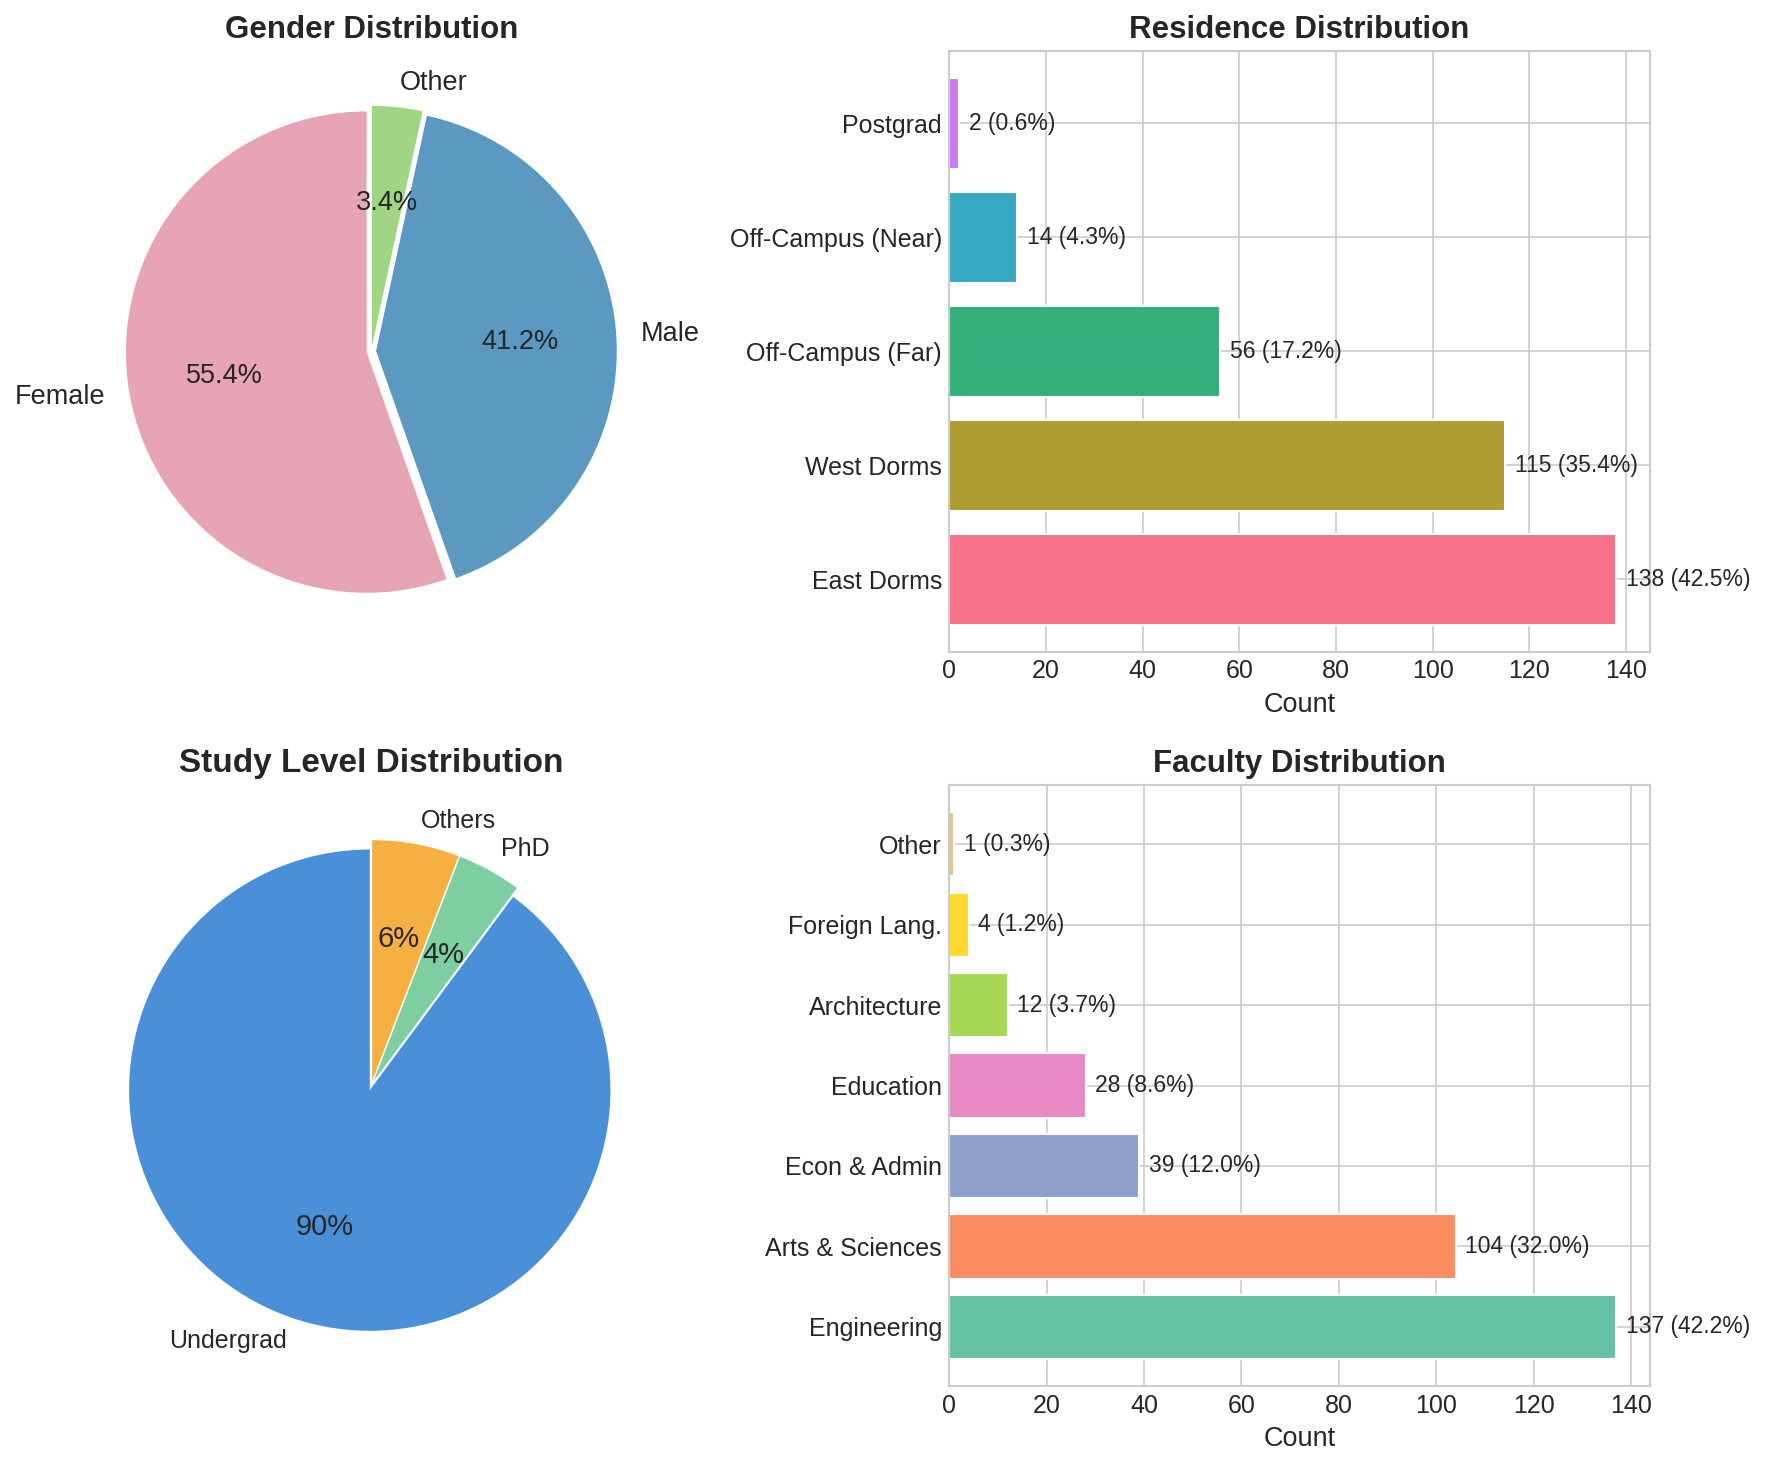

In [3]:
# =============================================================================
# FIGURE 1: Demographic Profile (2x2 subplot) - FIXED Study Level
# =============================================================================
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Gender
ax1 = axes[0, 0]
gender_counts = df['Gender'].value_counts()
colors = ['#E6A4B4', '#5B99C2', '#A0D683']
ax1.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%',
        colors=colors, startangle=90, explode=[0.02]*len(gender_counts),
        textprops={'fontsize': 13})
ax1.set_title('Gender Distribution', fontweight='bold', fontsize=15)

# Residence
ax2 = axes[0, 1]
residence_counts = df['Residence_Simplified'].value_counts()
residence_labels = ['East Dorms', 'West Dorms', 'Off-Campus (Far)', 'Off-Campus (Near)', 'Postgrad']
colors2 = sns.color_palette("husl", len(residence_counts))
bars = ax2.barh(range(len(residence_counts)), residence_counts.values, color=colors2, edgecolor='white')
ax2.set_yticks(range(len(residence_counts)))
ax2.set_yticklabels(residence_labels, fontsize=12)
ax2.set_xlabel('Count', fontsize=13)
ax2.set_title('Residence Distribution', fontweight='bold', fontsize=15)
for i, (count, pct) in enumerate(zip(residence_counts.values, residence_counts.values/len(df)*100)):
    ax2.text(count + 2, i, f'{count} ({pct:.1f}%)', va='center', fontsize=11)

# Study Level - FIXED: Combine small groups into "Other"
ax3 = axes[1, 0]

# First, let's see what values actually exist in your data
study_counts = df['Study_Level'].value_counts()

# Create combined categories based on actual values
undergrad_count = study_counts[study_counts.index.str.contains('Undergrad|Bachelor', case=False, na=False)].sum()
phd_count = study_counts[study_counts.index.str.contains('PhD|Doctoral', case=False, na=False)].sum()
others_count = study_counts.sum() - undergrad_count - phd_count

combined_study = pd.Series({
    'Undergrad': undergrad_count,
    'PhD': phd_count,
    'Others': others_count
})

# Remove any zero values
combined_study = combined_study[combined_study > 0]

colors3 = ['#4A90D9', '#7DCEA0', '#F5B041']
ax3.pie(combined_study.values, labels=combined_study.index, autopct='%1.0f%%',
        colors=colors3[:len(combined_study)], startangle=90, explode=[0.02]*len(combined_study))
ax3.set_title('Study Level Distribution', fontweight='bold')


# Faculty
ax4 = axes[1, 1]
faculty_counts = df['Faculty'].value_counts()
faculty_labels_short = ['Engineering', 'Arts & Sciences', 'Econ & Admin', 'Education', 'Architecture', 'Foreign Lang.', 'Other']
colors4 = sns.color_palette("Set2", len(faculty_counts))
bars = ax4.barh(range(len(faculty_counts)), faculty_counts.values, color=colors4, edgecolor='white')
ax4.set_yticks(range(len(faculty_counts)))
ax4.set_yticklabels(faculty_labels_short, fontsize=12)
ax4.set_xlabel('Count', fontsize=13)
ax4.set_title('Faculty Distribution', fontweight='bold', fontsize=15)
for i, (count, pct) in enumerate(zip(faculty_counts.values, faculty_counts.values/len(df)*100)):
    ax4.text(count + 2, i, f'{count} ({pct:.1f}%)', va='center', fontsize=11)

plt.tight_layout()
plt.show()
plt.close()

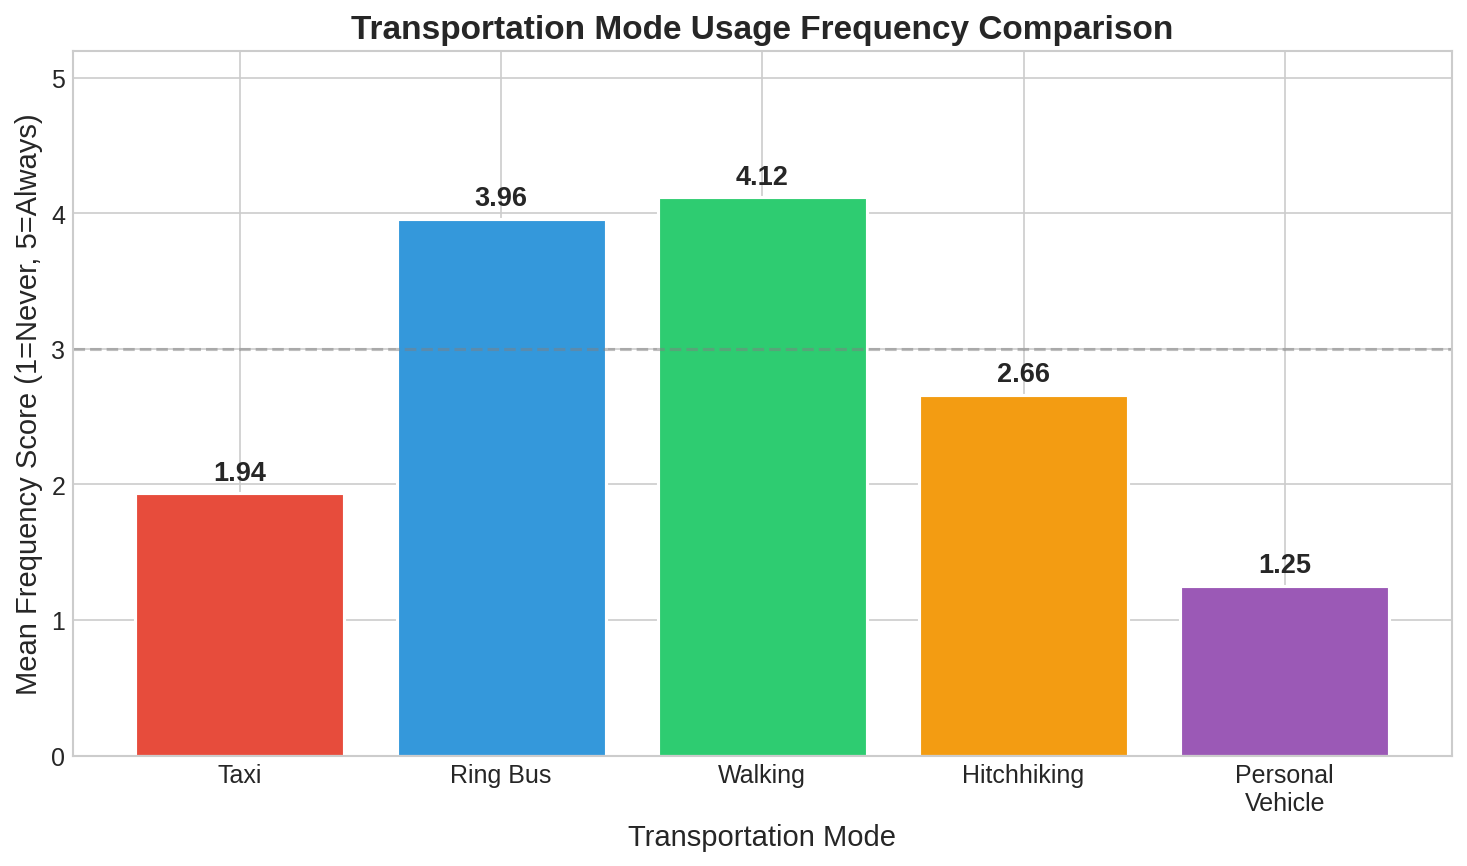

In [4]:
# =============================================================================
# FIGURE 2: Transportation Mode Comparison - NO ERROR BARS
# =============================================================================
fig, ax = plt.subplots(figsize=(10, 6))

transport_vars = ['Freq_Taxi', 'Freq_Ring', 'Freq_Walking', 'Freq_Hitchhiking', 'Freq_PersonalVehicle']
transport_labels = ['Taxi', 'Ring Bus', 'Walking', 'Hitchhiking', 'Personal\nVehicle']
means = df[transport_vars].mean()

colors = ['#E74C3C', '#3498DB', '#2ECC71', '#F39C12', '#9B59B6']
bars = ax.bar(transport_labels, means, color=colors, edgecolor='white', linewidth=1.5)

ax.set_ylabel('Mean Frequency Score (1=Never, 5=Always)', fontsize=14)
ax.set_xlabel('Transportation Mode', fontsize=14)
ax.set_title('Transportation Mode Usage Frequency Comparison', fontweight='bold', fontsize=16)
ax.set_ylim(0, 5.2)
ax.axhline(y=3, color='gray', linestyle='--', alpha=0.5, label='Midpoint (Sometimes)')

for bar, mean in zip(bars, means):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
            f'{mean:.2f}', ha='center', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()
plt.close()

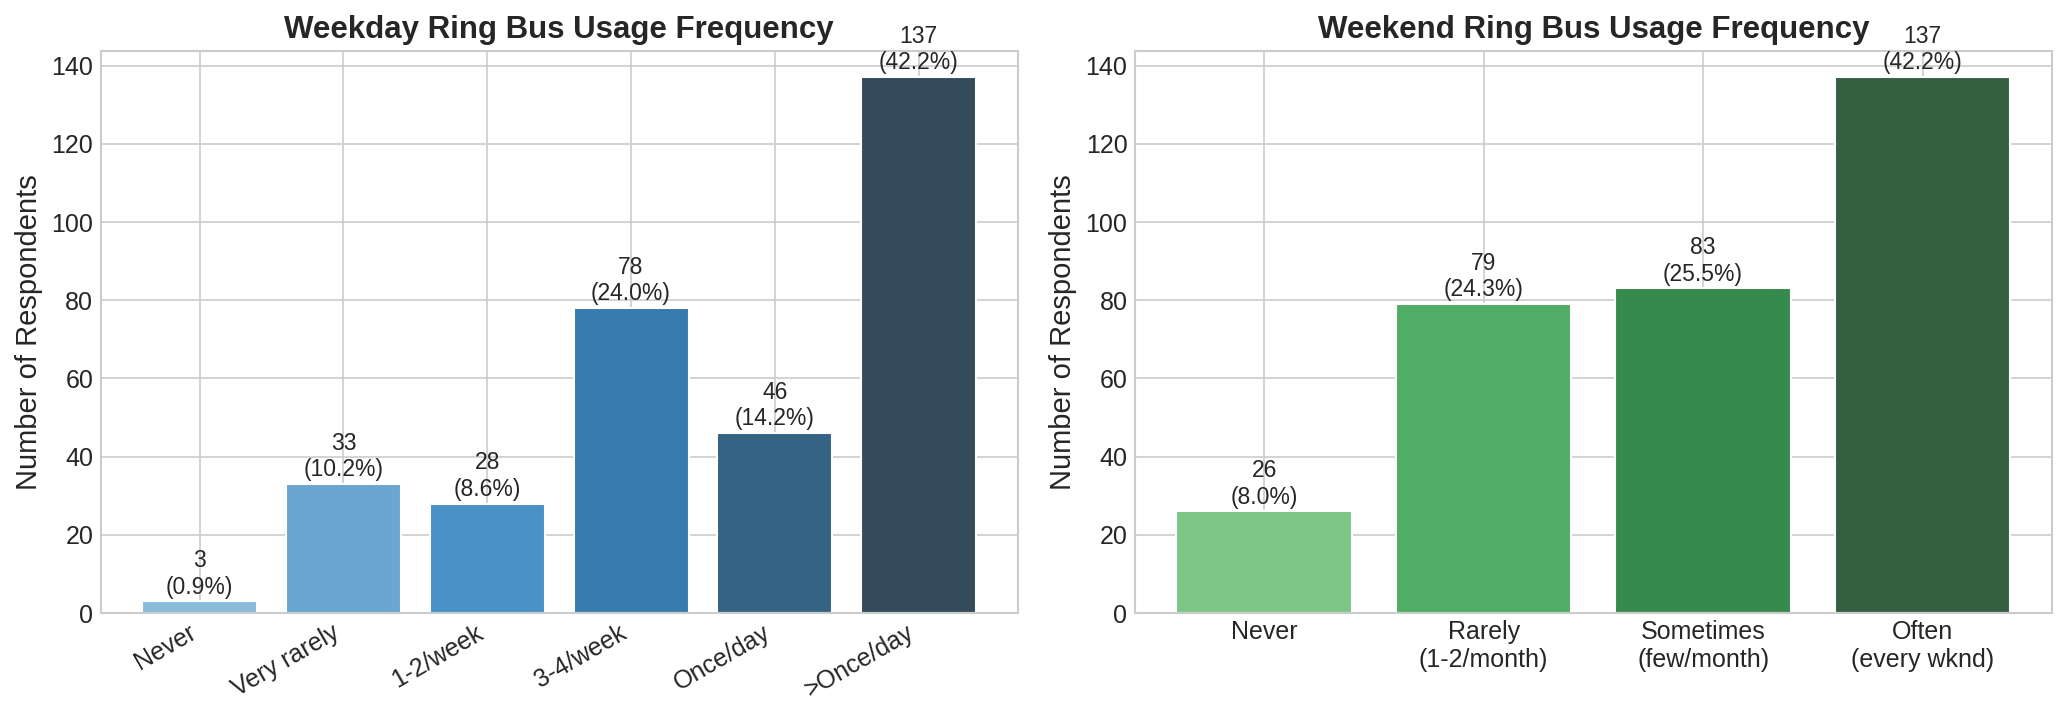

In [5]:
# =============================================================================
# FIGURE 3: Ring Bus Usage Frequency (Weekday & Weekend)
# =============================================================================
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Weekday
ax1 = axes[0]
weekday_labels = ['Never', 'Very rarely', '1-2/week', '3-4/week', 'Once/day', '>Once/day']
weekday_counts = df['Weekday_Ring_Frequency'].value_counts().sort_index()
colors_wk = sns.color_palette("Blues_d", len(weekday_counts))
bars = ax1.bar(range(len(weekday_counts)), weekday_counts.values, color=colors_wk, edgecolor='white')
ax1.set_xticks(range(len(weekday_counts)))
ax1.set_xticklabels(weekday_labels, rotation=30, ha='right', fontsize=12)
ax1.set_ylabel('Number of Respondents', fontsize=14)
ax1.set_title('Weekday Ring Bus Usage Frequency', fontweight='bold', fontsize=15)
for bar, count in zip(bars, weekday_counts.values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
             f'{count}\n({count/len(df)*100:.1f}%)', ha='center', fontsize=11)

# Weekend
ax2 = axes[1]
weekend_labels = ['Never', 'Rarely\n(1-2/month)', 'Sometimes\n(few/month)', 'Often\n(every wknd)']
weekend_counts = df['Weekend_Ring_Frequency'].value_counts().sort_index()
colors_we = sns.color_palette("Greens_d", len(weekend_counts))
bars = ax2.bar(range(len(weekend_counts)), weekend_counts.values, color=colors_we, edgecolor='white')
ax2.set_xticks(range(len(weekend_counts)))
ax2.set_xticklabels(weekend_labels, fontsize=12)
ax2.set_ylabel('Number of Respondents', fontsize=14)
ax2.set_title('Weekend Ring Bus Usage Frequency', fontweight='bold', fontsize=15)
for bar, count in zip(bars, weekend_counts.values):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
             f'{count}\n({count/len(df)*100:.1f}%)', ha='center', fontsize=11)

plt.tight_layout()
plt.show()
plt.close()


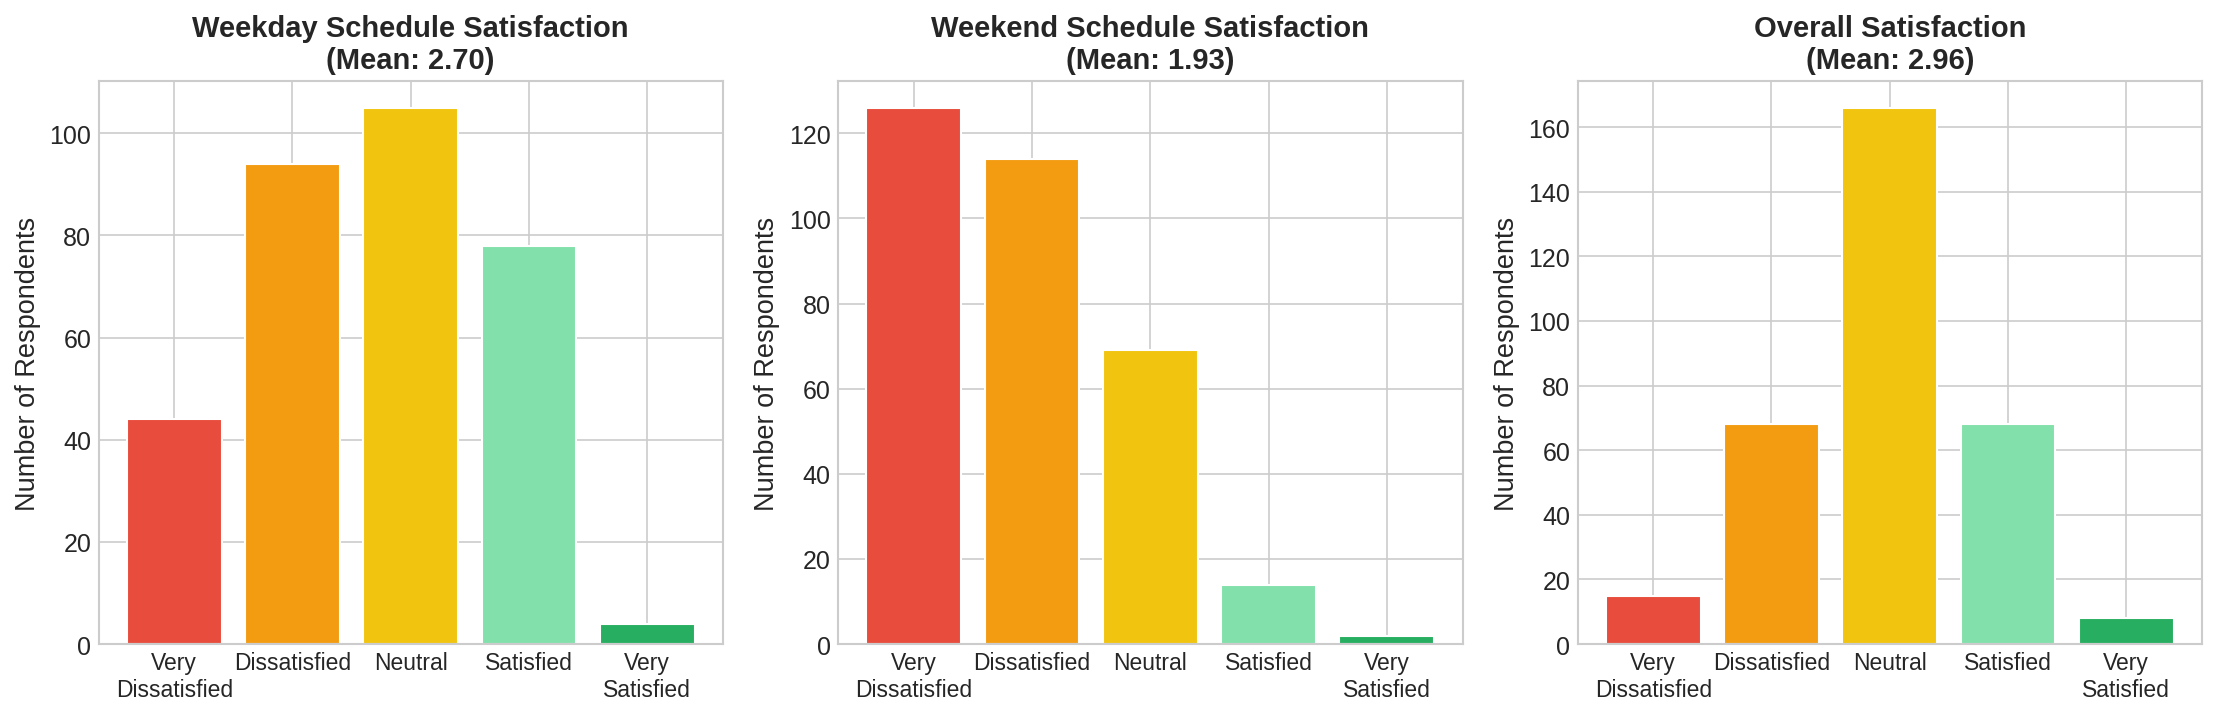

In [6]:
# =============================================================================
# FIGURE 4: Satisfaction Scores Distribution
# =============================================================================
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sat_labels = ['Very\nDissatisfied', 'Dissatisfied', 'Neutral', 'Satisfied', 'Very\nSatisfied']
colors_sat = ['#E74C3C', '#F39C12', '#F1C40F', '#82E0AA', '#27AE60']

# Weekday Satisfaction
ax1 = axes[0]
wkday_sat = df['Weekday_Schedule_Satisfaction'].value_counts().sort_index()
bars = ax1.bar(range(1, 6), [wkday_sat.get(i, 0) for i in range(1, 6)], color=colors_sat, edgecolor='white')
ax1.set_xticks(range(1, 6))
ax1.set_xticklabels(sat_labels, fontsize=11)
ax1.set_ylabel('Number of Respondents', fontsize=13)
ax1.set_title(f'Weekday Schedule Satisfaction\n(Mean: {df["Weekday_Schedule_Satisfaction"].mean():.2f})', fontweight='bold', fontsize=14)

# Weekend Satisfaction
ax2 = axes[1]
wkend_sat = df['Weekend_Schedule_Satisfaction'].value_counts().sort_index()
bars = ax2.bar(range(1, 6), [wkend_sat.get(i, 0) for i in range(1, 6)], color=colors_sat, edgecolor='white')
ax2.set_xticks(range(1, 6))
ax2.set_xticklabels(sat_labels, fontsize=11)
ax2.set_ylabel('Number of Respondents', fontsize=13)
ax2.set_title(f'Weekend Schedule Satisfaction\n(Mean: {df["Weekend_Schedule_Satisfaction"].mean():.2f})', fontweight='bold', fontsize=14)

# Overall Satisfaction
ax3 = axes[2]
overall_sat = df['Overall_Satisfaction'].value_counts().sort_index()
bars = ax3.bar(range(1, 6), [overall_sat.get(i, 0) for i in range(1, 6)], color=colors_sat, edgecolor='white')
ax3.set_xticks(range(1, 6))
ax3.set_xticklabels(sat_labels, fontsize=11)
ax3.set_ylabel('Number of Respondents', fontsize=13)
ax3.set_title(f'Overall Satisfaction\n(Mean: {df["Overall_Satisfaction"].mean():.2f})', fontweight='bold', fontsize=14)

plt.tight_layout()
plt.show()
plt.close()

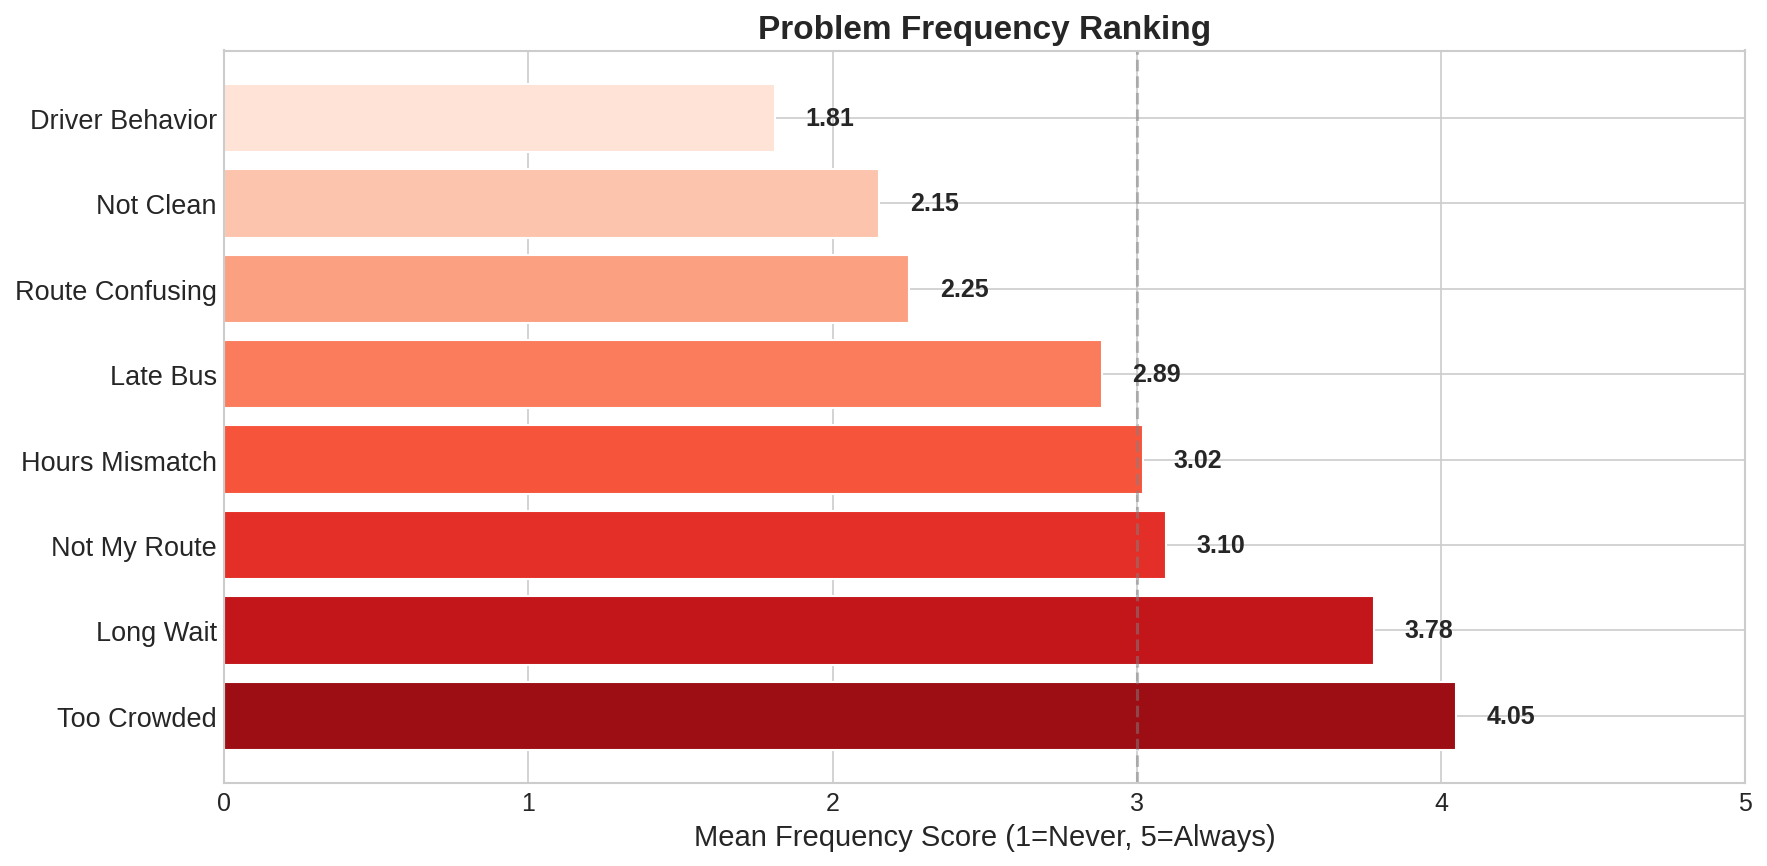

In [7]:
# =============================================================================
# FIGURE 5: Problem Frequency - NO ERROR BARS
# =============================================================================
fig, ax = plt.subplots(figsize=(12, 6))

problem_vars = ['Problem_TooCrowded', 'Problem_LongWait', 'Problem_NotMyRoute',
                'Problem_HoursMismatch', 'Problem_LateBus', 'Problem_RouteConfusing',
                'Problem_NotClean', 'Problem_DriverBehavior']
problem_labels = ['Too Crowded', 'Long Wait', 'Not My Route', 'Hours Mismatch',
                  'Late Bus', 'Route Confusing', 'Not Clean', 'Driver Behavior']
means = df[problem_vars].mean()

# Sort by mean
sorted_idx = np.argsort(means)[::-1]
means_sorted = means.iloc[sorted_idx]
labels_sorted = [problem_labels[i] for i in sorted_idx]

colors = sns.color_palette("Reds_r", len(problem_vars))
bars = ax.barh(range(len(means_sorted)), means_sorted.values, color=colors, edgecolor='white')

ax.set_yticks(range(len(means_sorted)))
ax.set_yticklabels(labels_sorted, fontsize=13)
ax.set_xlabel('Mean Frequency Score (1=Never, 5=Always)', fontsize=14)
ax.set_title('Problem Frequency Ranking', fontweight='bold', fontsize=16)
ax.axvline(x=3, color='gray', linestyle='--', alpha=0.5, label='Midpoint (Sometimes)')
ax.set_xlim(0, 5)

for i, mean in enumerate(means_sorted.values):
    ax.text(mean + 0.1, i, f'{mean:.2f}', va='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()
plt.close()


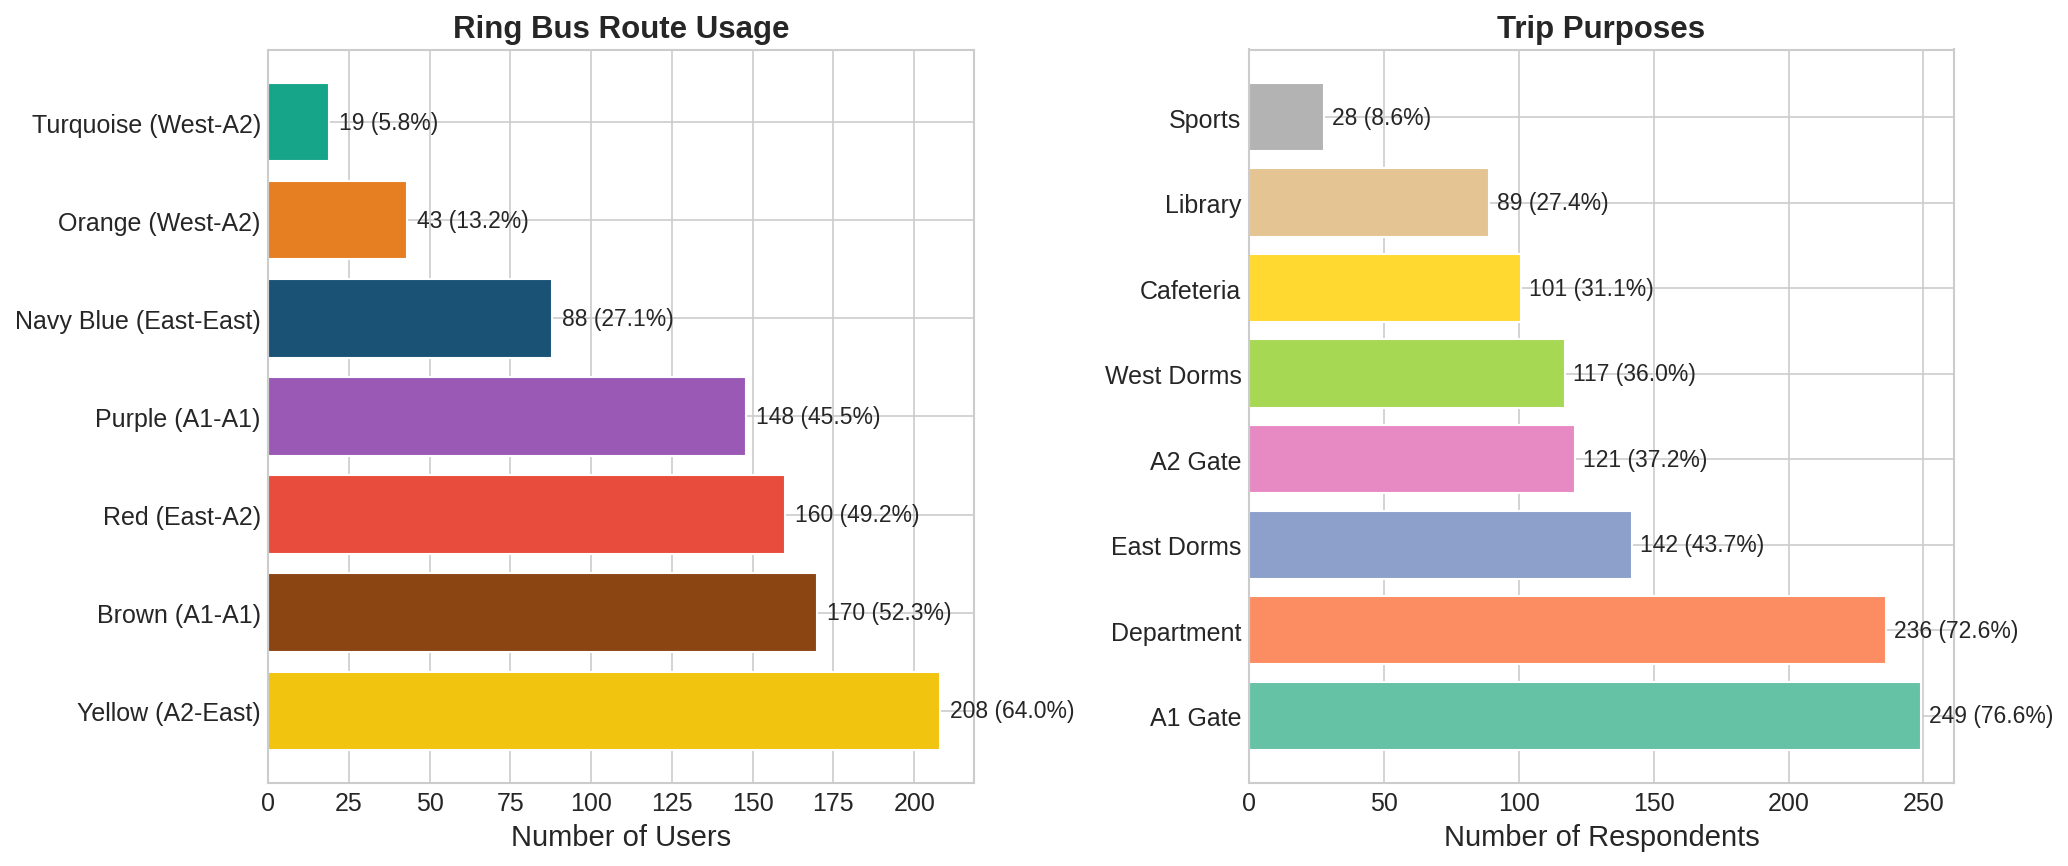

In [8]:
# =============================================================================
# FIGURE 6: Route Usage & Trip Purposes
# =============================================================================
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Route Usage
ax1 = axes[0]
route_vars = ['Route_Yellow_A2___East', 'Route_Brown_A1___A1', 'Route_Red_East___A2',
              'Route_Purple_A1___A1', 'Route_Navy_Blue_East___East', 'Route_Orange_West___A2',
              'Route_Turquoise_West___A2']
route_labels = ['Yellow (A2-East)', 'Brown (A1-A1)', 'Red (East-A2)', 'Purple (A1-A1)',
                'Navy Blue (East-East)', 'Orange (West-A2)', 'Turquoise (West-A2)']
route_counts = df[route_vars].sum()
route_colors = ['#F1C40F', '#8B4513', '#E74C3C', '#9B59B6', '#1A5276', '#E67E22', '#17A589']

bars = ax1.barh(range(len(route_counts)), route_counts.values, color=route_colors, edgecolor='white')
ax1.set_yticks(range(len(route_counts)))
ax1.set_yticklabels(route_labels, fontsize=12)
ax1.set_xlabel('Number of Users', fontsize=14)
ax1.set_title('Ring Bus Route Usage', fontweight='bold', fontsize=15)
for i, count in enumerate(route_counts.values):
    ax1.text(count + 3, i, f'{count} ({count/len(df)*100:.1f}%)', va='center', fontsize=11)

# Trip Purposes
ax2 = axes[1]
purpose_vars = ['Purpose_Going_to_A1_Gate', 'Purpose_Going_to_department',
                'Purpose_Going_to_East_Dorms', 'Purpose_Going_to_A2_Gate',
                'Purpose_Going_to_West_Dorms', 'Purpose_Going_to_cafeteria',
                'Purpose_Going_to_library', 'Purpose_Going_to_sports_facilitie']
purpose_labels = ['A1 Gate', 'Department', 'East Dorms', 'A2 Gate',
                  'West Dorms', 'Cafeteria', 'Library', 'Sports']
purpose_counts = df[purpose_vars].sum()
purpose_colors = sns.color_palette("Set2", len(purpose_counts))

bars = ax2.barh(range(len(purpose_counts)), purpose_counts.values, color=purpose_colors, edgecolor='white')
ax2.set_yticks(range(len(purpose_counts)))
ax2.set_yticklabels(purpose_labels, fontsize=12)
ax2.set_xlabel('Number of Respondents', fontsize=14)
ax2.set_title('Trip Purposes', fontweight='bold', fontsize=15)
for i, count in enumerate(purpose_counts.values):
    ax2.text(count + 3, i, f'{count} ({count/len(df)*100:.1f}%)', va='center', fontsize=11)

plt.tight_layout()
plt.show()
plt.close()


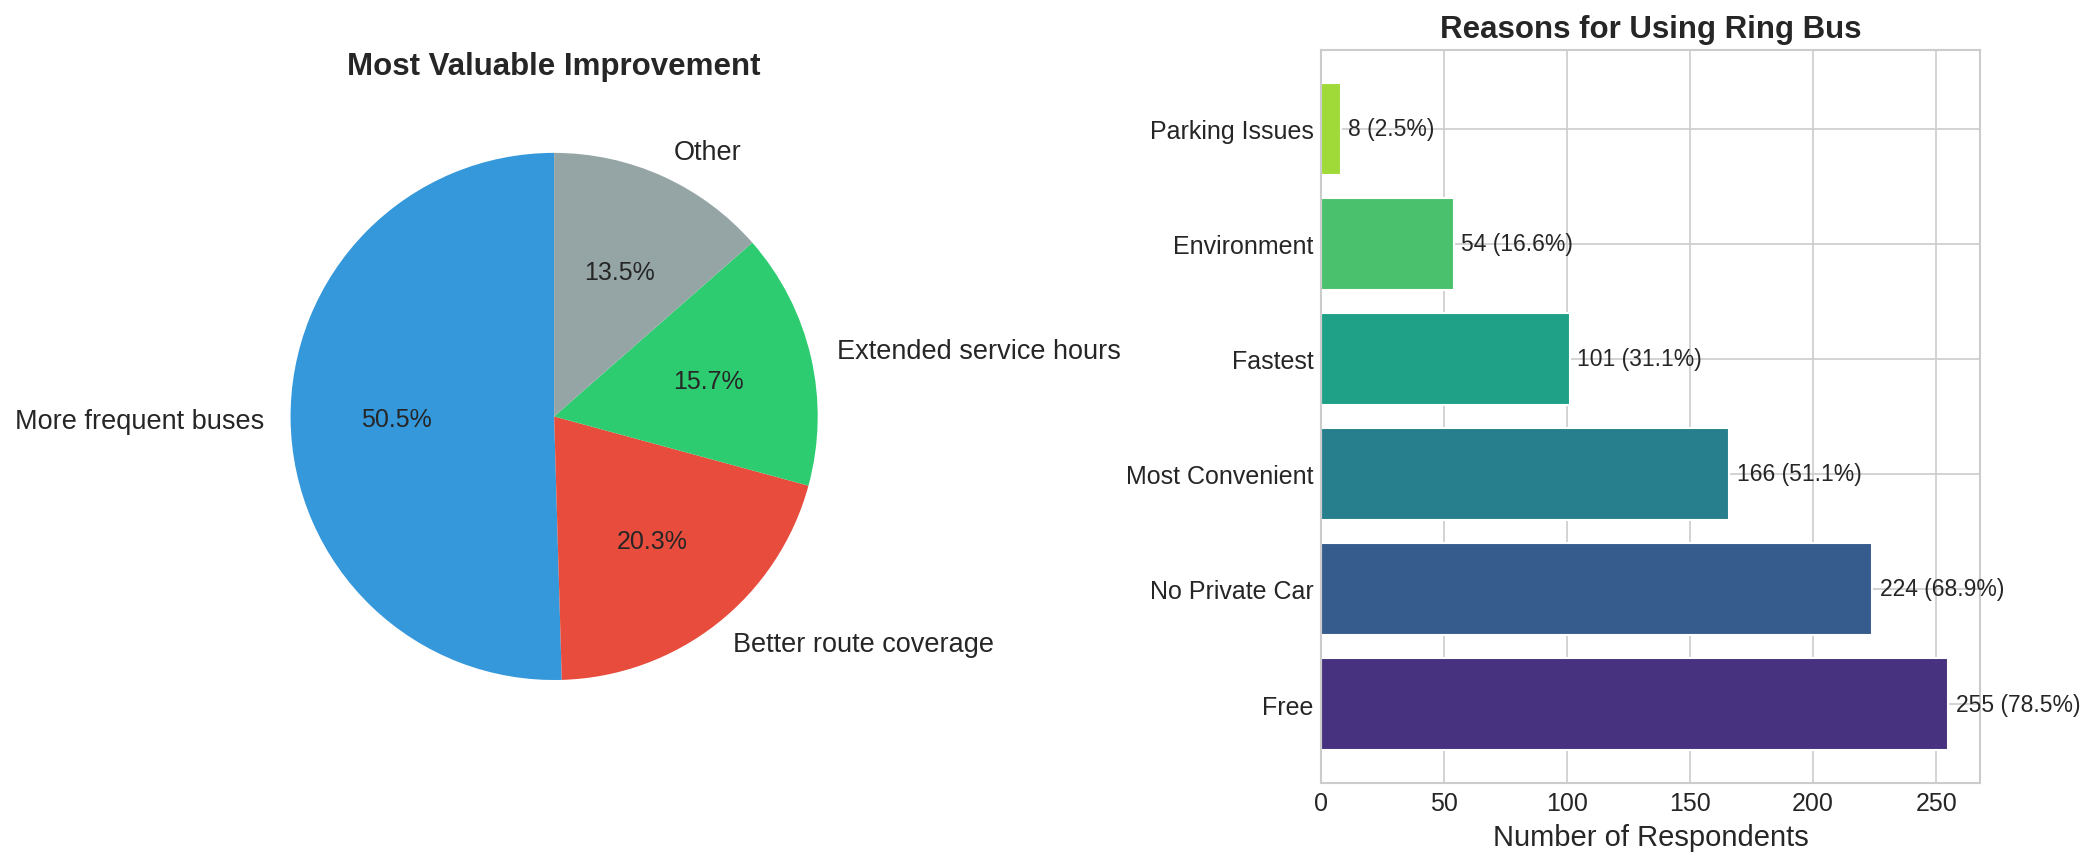

In [9]:
# =============================================================================
# FIGURE 7: Most Valuable Improvement (FIXED - combined small groups) & Reasons
# =============================================================================
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Most Valuable Improvement - FIXED: Combine 3 smallest groups
ax1 = axes[0]
improve_raw = df['MostValuable_Improvement'].value_counts()

# Combine: Better real-time tracking, Improved punctuality, More comfortable buses -> "Other"
main_categories = ['More frequent buses', 'Better route coverage', 'Extended service hours']
other_count = 0
improve_new = {}
for cat, count in improve_raw.items():
    if cat in main_categories:
        improve_new[cat] = count
    else:
        other_count += count
improve_new['Other'] = other_count

# Sort by count
improve_series = pd.Series(improve_new).sort_values(ascending=False)
colors = ['#3498DB', '#E74C3C', '#2ECC71', '#95A5A6']
wedges, texts, autotexts = ax1.pie(improve_series.values, labels=improve_series.index,
                                    autopct='%1.1f%%', colors=colors, startangle=90,
                                    textprops={'fontsize': 13})
for autotext in autotexts:
    autotext.set_fontsize(12)
ax1.set_title('Most Valuable Improvement', fontweight='bold', fontsize=15)

# Reasons for Using Ring Bus
ax2 = axes[1]
reason_vars = ['Reason_Free', 'Reason_No_private_car', 'Reason_Most_convenient',
               'Reason_Fastest', 'Reason_Better_for_environment', 'Reason_Hard_to_find_parking']
reason_labels = ['Free', 'No Private Car', 'Most Convenient', 'Fastest',
                 'Environment', 'Parking Issues']
reason_counts = df[reason_vars].sum()
reason_colors = sns.color_palette("viridis", len(reason_counts))

bars = ax2.barh(range(len(reason_counts)), reason_counts.values, color=reason_colors, edgecolor='white')
ax2.set_yticks(range(len(reason_counts)))
ax2.set_yticklabels(reason_labels, fontsize=12)
ax2.set_xlabel('Number of Respondents', fontsize=14)
ax2.set_title('Reasons for Using Ring Bus', fontweight='bold', fontsize=15)
for i, count in enumerate(reason_counts.values):
    ax2.text(count + 3, i, f'{count} ({count/len(df)*100:.1f}%)', va='center', fontsize=11)

plt.tight_layout()
plt.show()
plt.close()


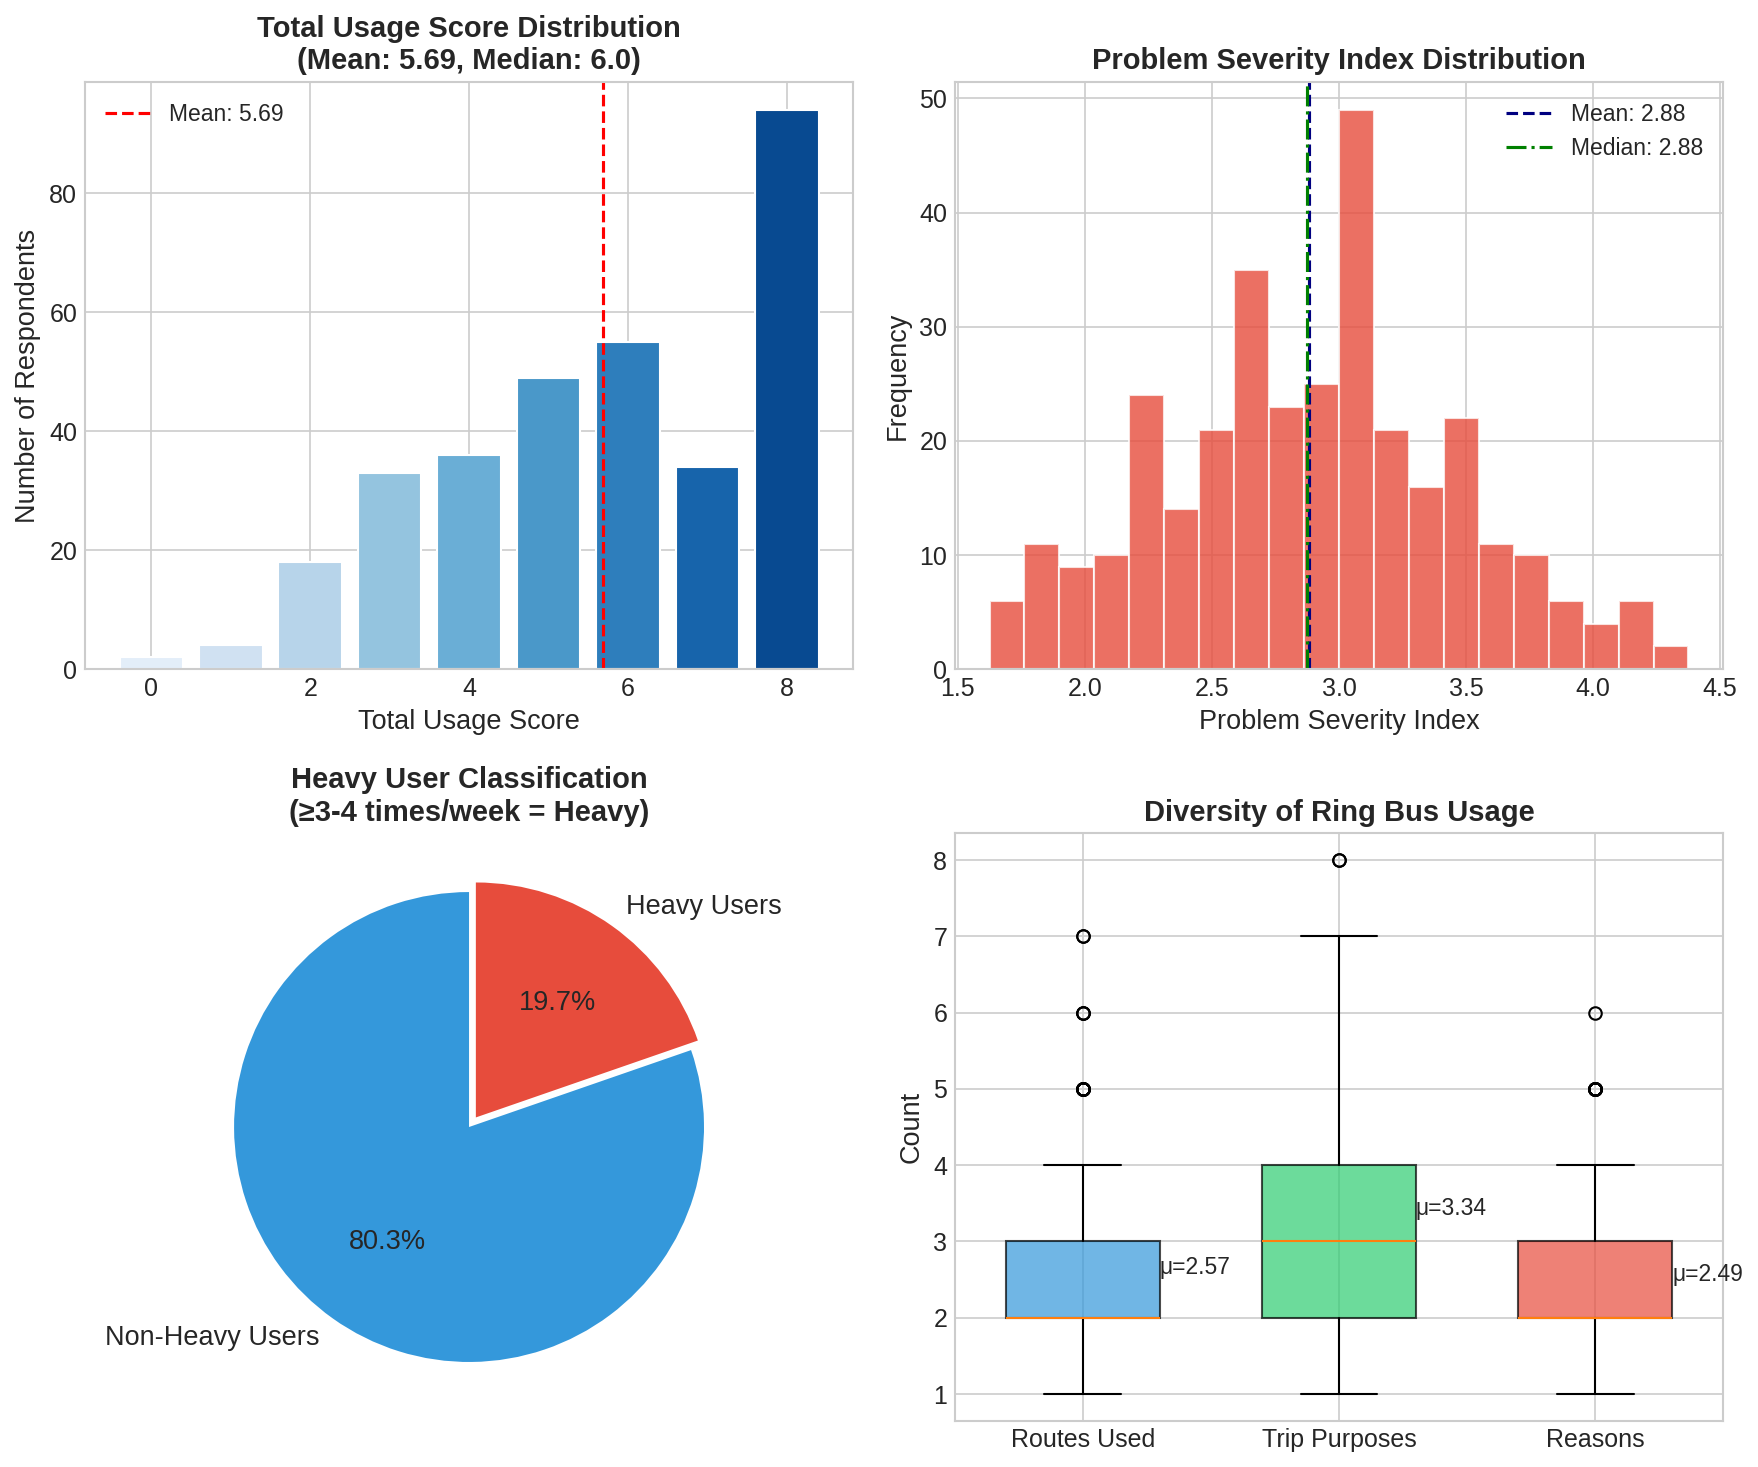

In [10]:
# =============================================================================
# FIGURE 8: Derived Variables Distribution - NO ERROR BARS
# =============================================================================
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Total Usage Score
ax1 = axes[0, 0]
usage_counts = df['Total_Usage_Score'].value_counts().sort_index()
colors = sns.color_palette("Blues", len(usage_counts))
bars = ax1.bar(usage_counts.index, usage_counts.values, color=colors, edgecolor='white')
ax1.set_xlabel('Total Usage Score', fontsize=13)
ax1.set_ylabel('Number of Respondents', fontsize=13)
ax1.set_title(f'Total Usage Score Distribution\n(Mean: {df["Total_Usage_Score"].mean():.2f}, Median: {df["Total_Usage_Score"].median():.1f})',
              fontweight='bold', fontsize=14)
ax1.axvline(x=df['Total_Usage_Score'].mean(), color='red', linestyle='--', label=f'Mean: {df["Total_Usage_Score"].mean():.2f}')
ax1.legend(fontsize=11)

# Problem Severity Index
ax2 = axes[0, 1]
ax2.hist(df['Problem_Severity_Index'], bins=20, color='#E74C3C', edgecolor='white', alpha=0.8)
ax2.axvline(x=df['Problem_Severity_Index'].mean(), color='navy', linestyle='--',
            label=f'Mean: {df["Problem_Severity_Index"].mean():.2f}')
ax2.axvline(x=df['Problem_Severity_Index'].median(), color='green', linestyle='-.',
            label=f'Median: {df["Problem_Severity_Index"].median():.2f}')
ax2.set_xlabel('Problem Severity Index', fontsize=13)
ax2.set_ylabel('Frequency', fontsize=13)
ax2.set_title('Problem Severity Index Distribution', fontweight='bold', fontsize=14)
ax2.legend(fontsize=11)

# Heavy User
ax3 = axes[1, 0]
heavy_counts = df['Heavy_User'].value_counts()
labels = ['Non-Heavy Users', 'Heavy Users']
colors = ['#3498DB', '#E74C3C']
explode = [0, 0.05]
ax3.pie(heavy_counts.values, labels=labels, autopct='%1.1f%%', colors=colors,
        explode=explode, startangle=90, textprops={'fontsize': 13})
ax3.set_title('Heavy User Classification\n(≥3-4 times/week = Heavy)', fontweight='bold', fontsize=14)

# Route/Purpose/Reason Count - NO ERROR BARS
ax4 = axes[1, 1]
diversity_vars = ['Route_Count', 'Purpose_Count', 'Reason_Count']
diversity_labels = ['Routes Used', 'Trip Purposes', 'Reasons']
positions = range(len(diversity_vars))

bp = ax4.boxplot([df[var].values for var in diversity_vars], positions=positions,
                  patch_artist=True, widths=0.6)
colors = ['#3498DB', '#2ECC71', '#E74C3C']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax4.set_xticks(positions)
ax4.set_xticklabels(diversity_labels, fontsize=12)
ax4.set_ylabel('Count', fontsize=13)
ax4.set_title('Diversity of Ring Bus Usage', fontweight='bold', fontsize=14)

# Add mean annotations
for i, var in enumerate(diversity_vars):
    ax4.annotate(f'μ={df[var].mean():.2f}', xy=(i, df[var].mean()),
                 xytext=(i+0.3, df[var].mean()), fontsize=11)

plt.tight_layout()
plt.show()
plt.close()


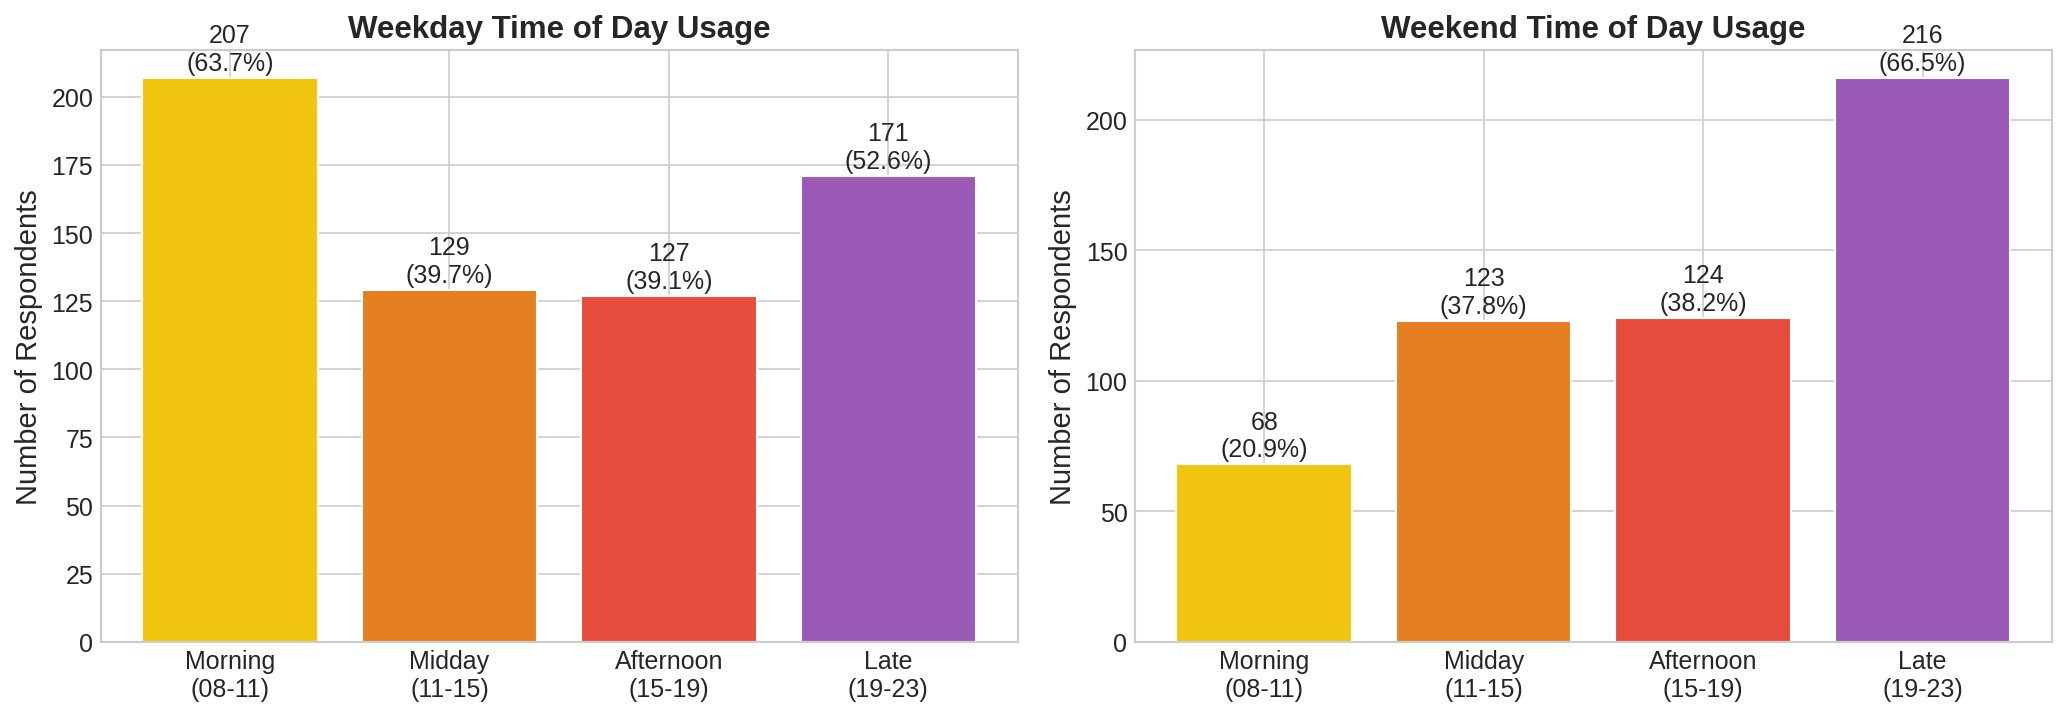

In [11]:
# =============================================================================
# FIGURE 9: Time of Day Usage Patterns
# =============================================================================
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Weekday Time Patterns
ax1 = axes[0]
time_wkday_vars = ['TimeWkday_Morning_08:00_11:00', 'TimeWkday_Midday_11:00_15:00',
                   'TimeWkday_Afternoon_15:00_19:00', 'TimeWkday_Late_19:00_23:00']
time_labels = ['Morning\n(08-11)', 'Midday\n(11-15)', 'Afternoon\n(15-19)', 'Late\n(19-23)']
wkday_counts = df[time_wkday_vars].sum()
colors = ['#F1C40F', '#E67E22', '#E74C3C', '#9B59B6']

bars = ax1.bar(time_labels, wkday_counts.values, color=colors, edgecolor='white')
ax1.set_ylabel('Number of Respondents', fontsize=14)
ax1.set_title('Weekday Time of Day Usage', fontweight='bold', fontsize=15)
ax1.tick_params(axis='x', labelsize=12)
for bar, count in zip(bars, wkday_counts.values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 3,
             f'{count}\n({count/len(df)*100:.1f}%)', ha='center', fontsize=12)

# Weekend Time Patterns
ax2 = axes[1]
time_wkend_vars = ['TimeWkend_Morning_08:00_11:00', 'TimeWkend_Midday_11:00_15:00',
                   'TimeWkend_Afternoon_15:00_19:00', 'TimeWkend_Late_19:00_23:00']
wkend_counts = df[time_wkend_vars].sum()

bars = ax2.bar(time_labels, wkend_counts.values, color=colors, edgecolor='white')
ax2.set_ylabel('Number of Respondents', fontsize=14)
ax2.set_title('Weekend Time of Day Usage', fontweight='bold', fontsize=15)
ax2.tick_params(axis='x', labelsize=12)
for bar, count in zip(bars, wkend_counts.values):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 3,
             f'{count}\n({count/len(df)*100:.1f}%)', ha='center', fontsize=12)

plt.tight_layout()
plt.show()
plt.close()


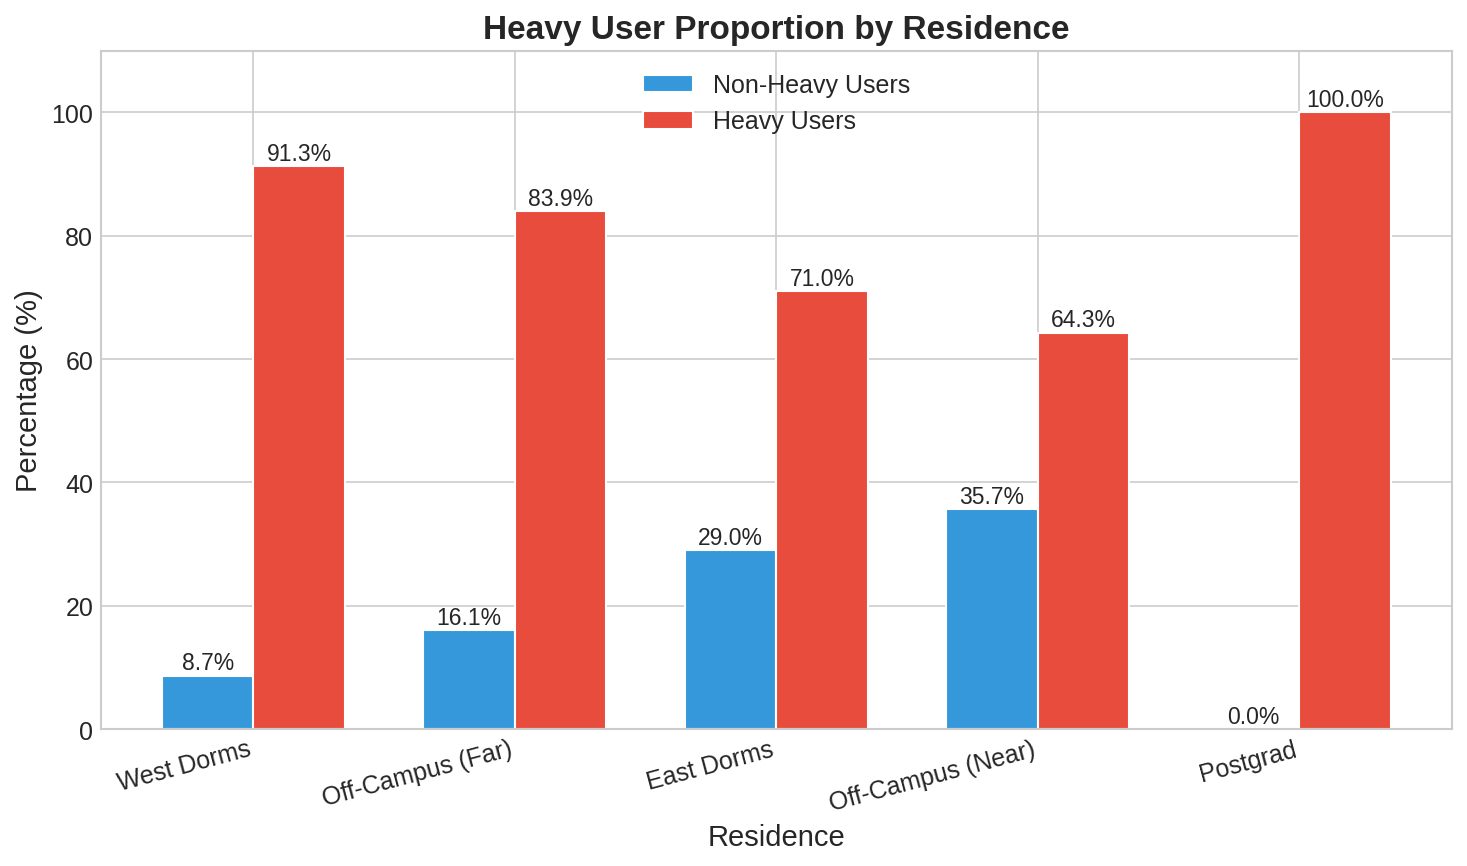

In [12]:
# =============================================================================
# FIGURE 10: Heavy User by Residence
# =============================================================================
fig, ax = plt.subplots(figsize=(10, 6))

cross_pct = pd.crosstab(df['Residence_Simplified'], df['Heavy_User'], normalize='index') * 100
residence_order = ['West_Dorms', 'Off_Campus_Far', 'East_Dorms', 'Off_Campus_Near', 'Postgrad_Guesthouse']
residence_labels = ['West Dorms', 'Off-Campus (Far)', 'East Dorms', 'Off-Campus (Near)', 'Postgrad']
cross_pct = cross_pct.reindex(residence_order)

x = np.arange(len(residence_labels))
width = 0.35

bars1 = ax.bar(x - width/2, cross_pct[0].values, width, label='Non-Heavy Users', color='#3498DB', edgecolor='white')
bars2 = ax.bar(x + width/2, cross_pct[1].values, width, label='Heavy Users', color='#E74C3C', edgecolor='white')

ax.set_ylabel('Percentage (%)', fontsize=14)
ax.set_xlabel('Residence', fontsize=14)
ax.set_title('Heavy User Proportion by Residence', fontweight='bold', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(residence_labels, rotation=15, ha='right', fontsize=12)
ax.legend(fontsize=12)
ax.set_ylim(0, 110)

for bar in bars1:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
            f'{bar.get_height():.1f}%', ha='center', fontsize=11)
for bar in bars2:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
            f'{bar.get_height():.1f}%', ha='center', fontsize=11)

plt.tight_layout()
plt.show()
plt.close()